## Lecture 8 Generate Maps w/ Cartopy

### Review of Lecture 7  

* 2-D NumPy arrays  
* Loading data files using np.loadtxt() and np.genfromtxt() functions  


### In this lecture we will:

- start to make some basic maps using **Cartopy**, together with data points

There are many ways to make maps in Python. In this course, we used to use **basemap** as our go-to module for generating simple map projections. However, basemap became obsolete in 2020, so we switch to **cartopy**. So the first thing we have to do is install the **cartopy** (https://scitools.org.uk/cartopy/docs/latest/) module in *anaconda*:  

- Step 1: open your Anaconda Navigator
- Step 2: click the tab on the left named **environment**, here you can see what modules are installed in your Python environment
- Step 3: Select the "Not installed" option from the first drop-down manu
- Step 4: find the module called "cartopy", select it and click the **apply** button in the bottom right corner
- a window will pop out and just proceed, now Anacoda is installing the cartopy module for you automatically

If your Python (>3.8) does not work with the installed cartopy module, you'll need to create a new **environment** to start over. Here's the process:

* Step 1: open your Anaconda Navigator
* Step 2: select the "environment" tab on the left, click "create" in the bottom left
* Step 3: in the pop-out window, name your new environment and select (Python 3.7 - 3.8 should also work), click "create"
* Step 4: in the new environment, install **cartopy** using the process described above
* Step 5: you also need to install "jupyter" in your new environment
* Step 6: launch jupyter notebook from the new environment

Once the install is done, we need to import the cartopy module. The syntax for importing is the same as importing numpy: **import cartopy.crs as ccrs**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

As you may see in your future study and research, there are many different types of maps for Earth Sciences.  A map is basically a projection tries to represent something that is essentially 3D (a globe) onto a 2D medium (a paper or a computer screen).  So all maps, except those at the smallest scale, will increasingly distort the area as the scale increases because the Earth is not flat. (well there is a modern flat earth society...)

When we choose a map projection, we seek the one that distorts the least for our purpose.  Here we will use a few popular projections, to make maps on both the global and local scale.  

Maps are instances of the Basemap class. They have many methods, for example: 
- outlining continents  
- draw national boundaries
- draw state boundaries 
- plotting geospatial data, such as sampling locations, earthquakes, 
- and much else.

Try **help(ccrs)** and see what you can do with this module

Before we plot can plot a set of coordinates, they must be transformed from latitudes and longitudes to map coordinates and then plotted like anything else in matplotlib. In general we also need the **numpy** and **matplotlib.pyplot** modules as well.

In [2]:
help(ccrs)

Help on module cartopy.crs in cartopy:

NAME
    cartopy.crs

DESCRIPTION
    The crs module defines Coordinate Reference Systems and the transformations
    between them.

CLASSES
    cartopy._crs.CRS(builtins.object)
        Projection
            AlbersEqualArea
            AzimuthalEquidistant
            EquidistantConic
            Gnomonic
            InterruptedGoodeHomolosine
            LambertAzimuthalEqualArea
            LambertConformal
            Mercator
            Orthographic
            Sinusoidal
            Stereographic
                NorthPolarStereo
                SouthPolarStereo
            TransverseMercator
                OSGB
                OSNI
            UTM
                EuroPP
        RotatedGeodetic
    _CylindricalProjection(_RectangularProjection)
        PlateCarree
        RotatedPole
    _Eckert(_WarpedRectangularProjection)
        EckertI
        EckertII
        EckertIII
        EckertIV
        EckertV
        EckertVI
    _Rectangul

First task is to create an "empty" map - we can see that the Axes created is indeed one of those GeoAxesSubplot object. Here we used a map projection called PlateCarree (instead of Mercator)

<GeoAxesSubplot:>

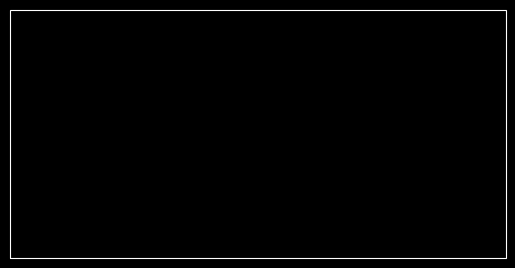

In [3]:
plt.axes(projection=ccrs.PlateCarree())

To see the default map, just add the coastlines using the .coastlines() function:

c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


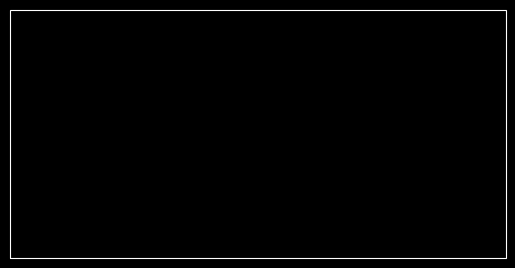

In [4]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

This gives a simple world map as we usually see in places. If you do a help( ) command for the functions used, you'll get a complete description about these functions.

We can put on gridlines using the .gridlines() function:

c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\mpl\gridliner.py:531: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\mpl\gridliner.py:538: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\numpy\lib\function_base.py:4665: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = asanyarray(arr)
c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packa

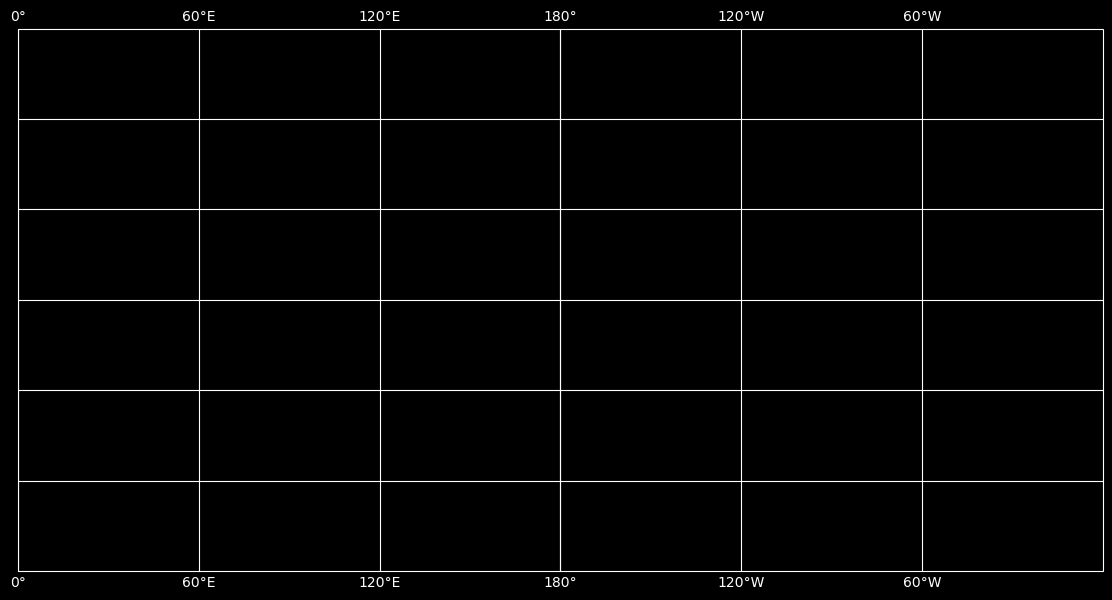

In [5]:
plt.figure(figsize=(14,10)) # create a figure with a size of (20,15)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # create a map project of PlateCarree
ax.coastlines() # plot coastlines
ax.coastlines(resolution='110m') # set the coastline resolution - optional
ax.gridlines(draw_labels = True) # draw lat-lon labels
plt.show()
# help(ax.gridlines)

Now we can add more features to the map using the **cfeature** attribute in cartopy. For example, adding OCEAN and LAND would give a basic version of the map:

c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


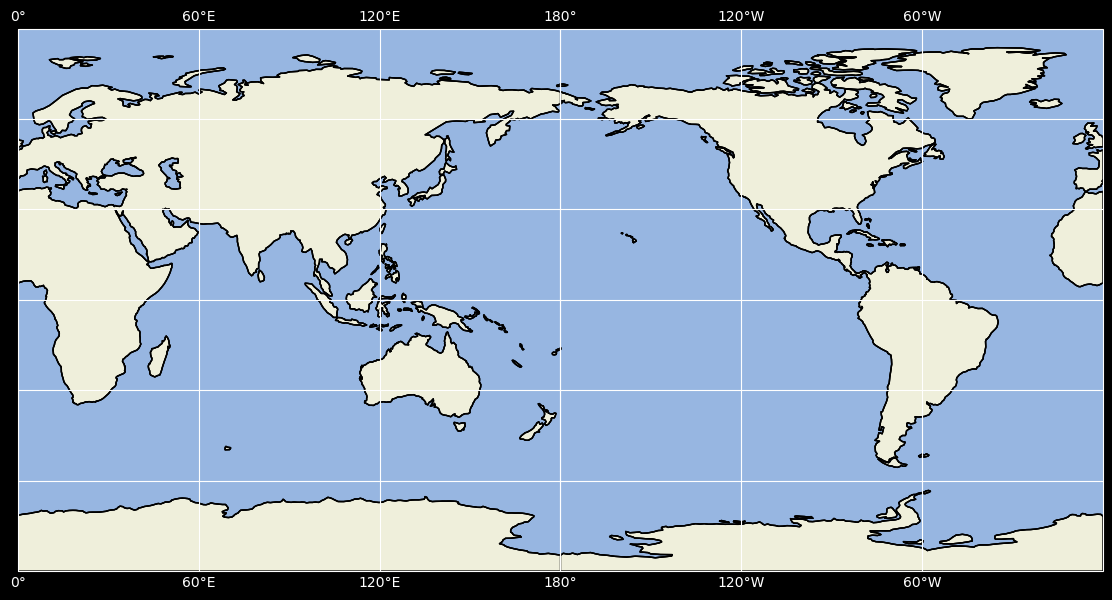

In [6]:
import cartopy.feature as cfeature 

plt.figure(figsize=(14,10)) # create a figure with a size of (20,15)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # create a map project of PlateCarree
ax.coastlines() # plot coastlines
ax.coastlines(resolution='110m') # set the coastline resolution - optional
ax.gridlines(draw_labels = True) # add lat-lon grid lines
ax.add_feature(cfeature.OCEAN)   # add ocean color
ax.add_feature(cfeature.LAND, edgecolor='black') # add land color, with black lines
plt.show()

There are more features to add, sometimes they are useful (not always necessary though)

c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


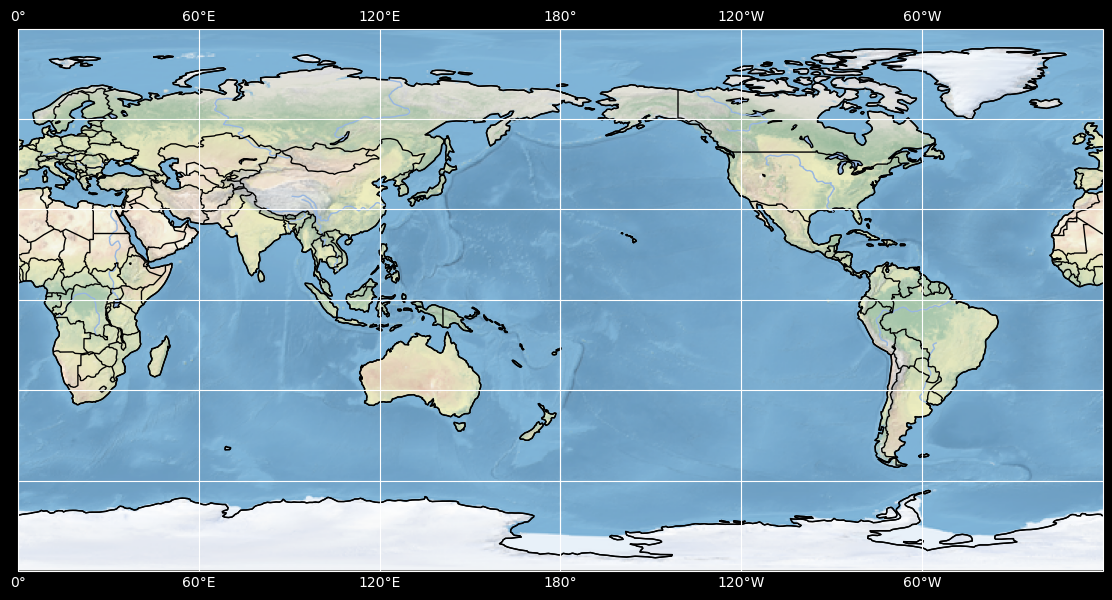

In [7]:
plt.figure(figsize=(14,10)) # create a figure with a size of (20,15)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # create a map project of PlateCarree
ax.coastlines() # plot coastlines
ax.coastlines(resolution='110m') # set the coastline resolution - optional
ax.gridlines(draw_labels = True) # add lat-lon grid lines
ax.add_feature(cfeature.OCEAN)   # add ocean color
ax.add_feature(cfeature.LAND, edgecolor='black') # add land color, with black lines
ax.add_feature(cfeature.LAKES, edgecolor='black')# add lake color, with black lines
ax.add_feature(cfeature.RIVERS)  # add rivers
ax.add_feature(cfeature.BORDERS) # add country borders
ax.stock_img()
plt.show()

Now we can put data onto our map

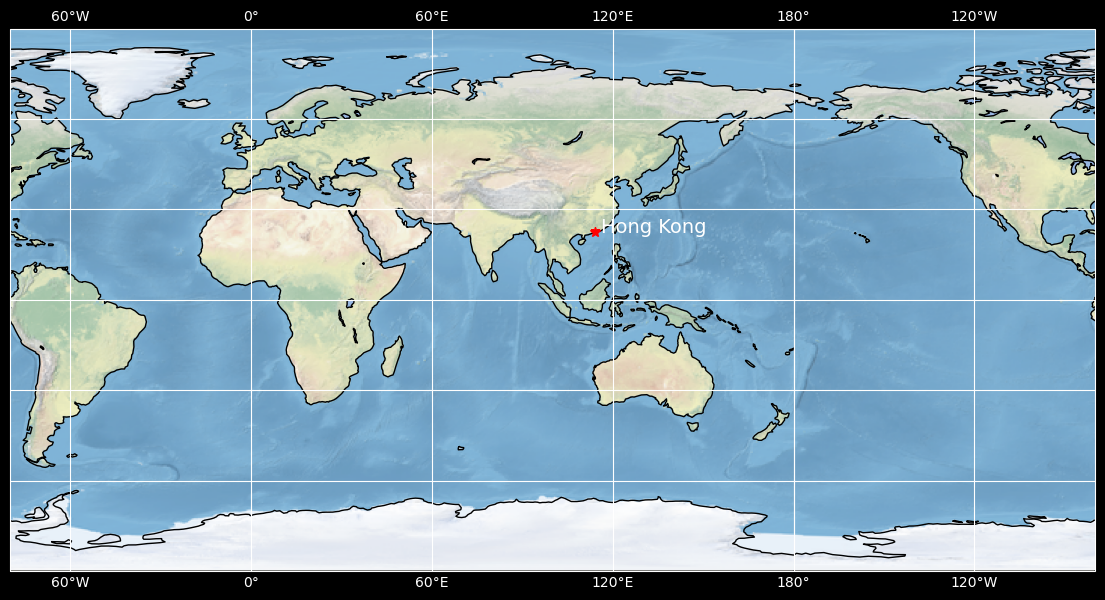

In [8]:
# create a figure and map projection
plt.figure(figsize=(14,10)) # create a figure with asize of (20,15)
# create a map project of PlateCarree
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=100)) 
ax.coastlines(resolution='110m') # plot coastlines

# add some map features
ax.gridlines(draw_labels = True)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.stock_img()

# set the lat and long of Hong Kong
HK_lat=22.3964   # latitude
HK_lon=114.1095  # longitude

# map the location of HK onto the map using the plot() function
ax.plot(HK_lon, HK_lat, 'r*', markersize=7, transform=ccrs.PlateCarree())

# Anotate the marker using the text() function
ax.text(HK_lon+2, HK_lat, 'Hong Kong', fontsize=14,transform=ccrs.PlateCarree())

# show the tlobal map
ax.set_global()

plt.show()

We can also make a local map using the set_extend() function

c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


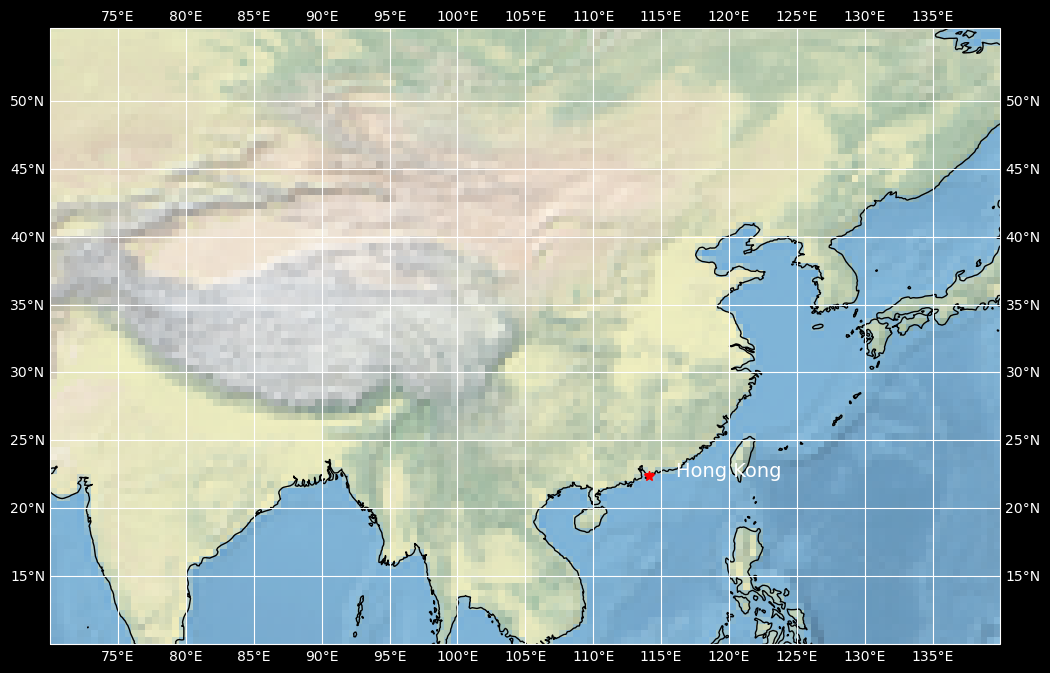

In [9]:
# create a figure and map projection
plt.figure(figsize=(14,8)) # create a figure with asize of (20,15)
# create a map project of PlateCarree
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines(resolution='50m') # plot coastlines

extent = [70, 140, 10, 50] # set the extension of the map: [lon_left, lon_right, lat_low, lat_high]
ax.set_extent(extent) 

# add some map features
ax.gridlines(draw_labels=True, xlocs=range(70,140,5), ylocs=range(10,55,5))
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.stock_img()

# map the location of HK onto the map using the plot() function
ax.plot(HK_lon, HK_lat, 'r*', markersize=7, transform=ccrs.PlateCarree())

# Anotate the marker using the text() function
ax.text(HK_lon+2, HK_lat, 'Hong Kong', fontsize=14,transform=ccrs.PlateCarree())

plt.show()

Now let's map the earthquake data onto our first global map using Cartopy

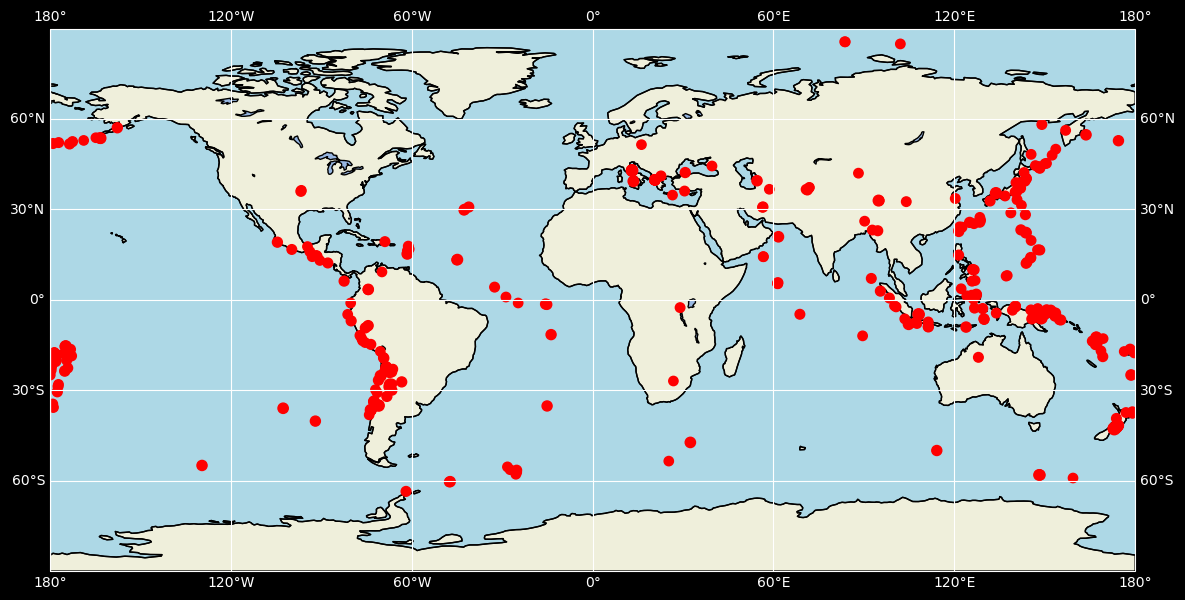

In [12]:
EQ = np.loadtxt('./earthquake.csv', delimiter=',',skiprows=1)
disa = EQ[:,3]>7.5

lat = EQ[:,0]
lon = EQ[:,1]
dep = EQ[:,2]
mag = EQ[:,3]

plt.figure(figsize=(14,10)) # create a figure with asize of (20,15)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0)) # create a map project of PlateCarree
ax.coastlines(resolution='110m') # plot coastlines

ax.gridlines(draw_labels = True)
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')

ax.scatter(lon, lat, mag*10, color='r', transform=ccrs.PlateCarree())
ax.set_global()

### Orthographic Projection

The Mercator is a nice classical map, but it sure does distort the map at high latitudes. Think back to the lecture on the hypsometric curves...  

Another type of map projection is the orthographic projection which is much less distorted. The downside to this projection is that you cannot see the whole globe at once.   To create an orthographic map, you initialize a map instance with the arguments **lon_0** and **lat_0** - the central longitude and latitude- instead of the lower left/upper right corner syntax. 

c:\Users\86152\anaconda3\envs\bert_chinese\lib\site-packages\cartopy\mpl\gridliner.py:543: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for inter in intersection:


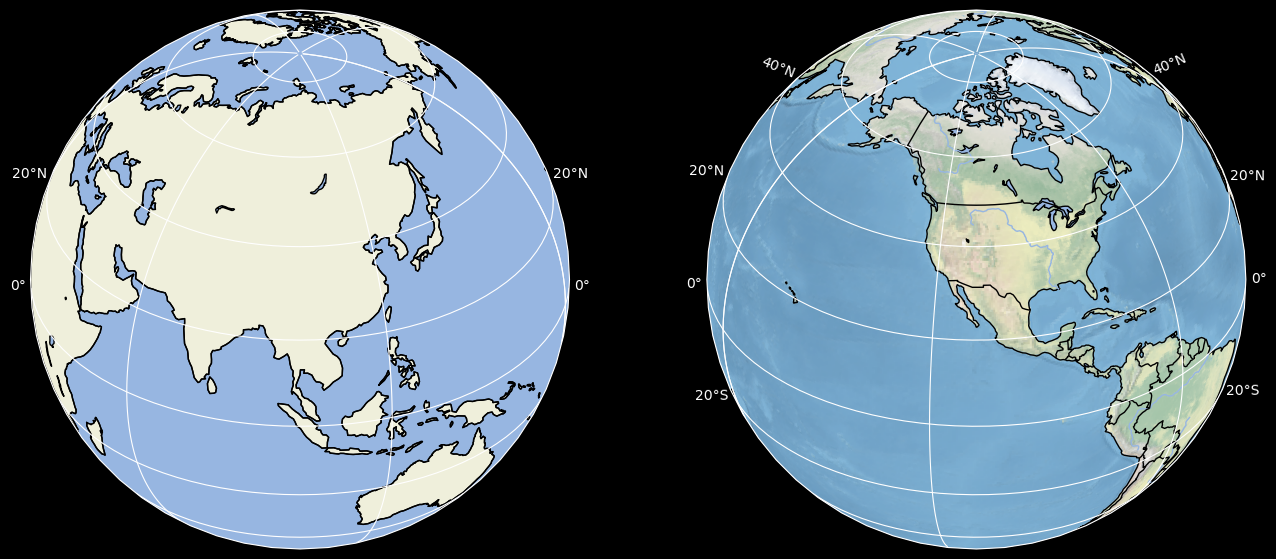

In [13]:
fig=plt.figure(figsize=(16,7)) # create a figure with asize of (20,15)
ax = fig.add_subplot(1,2,1,projection = ccrs.Orthographic(central_longitude=100, central_latitude=33)) # create a map project of PlateCarree
ax.coastlines(resolution='110m') # plot coastlines

ax.gridlines(draw_labels = True) # add grid lines
ax.add_feature(cfeature.OCEAN)   # add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')

ax = fig.add_subplot(1,2,2,projection = ccrs.Orthographic(central_longitude=250, central_latitude=33)) # create a map project of PlateCarree
ax.coastlines(resolution='110m') # plot coastlines

ax.gridlines(draw_labels = True) # add grid lines
ax.add_feature(cfeature.OCEAN) # add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.stock_img()
plt.show()

We can use more projections - using a for-loop!

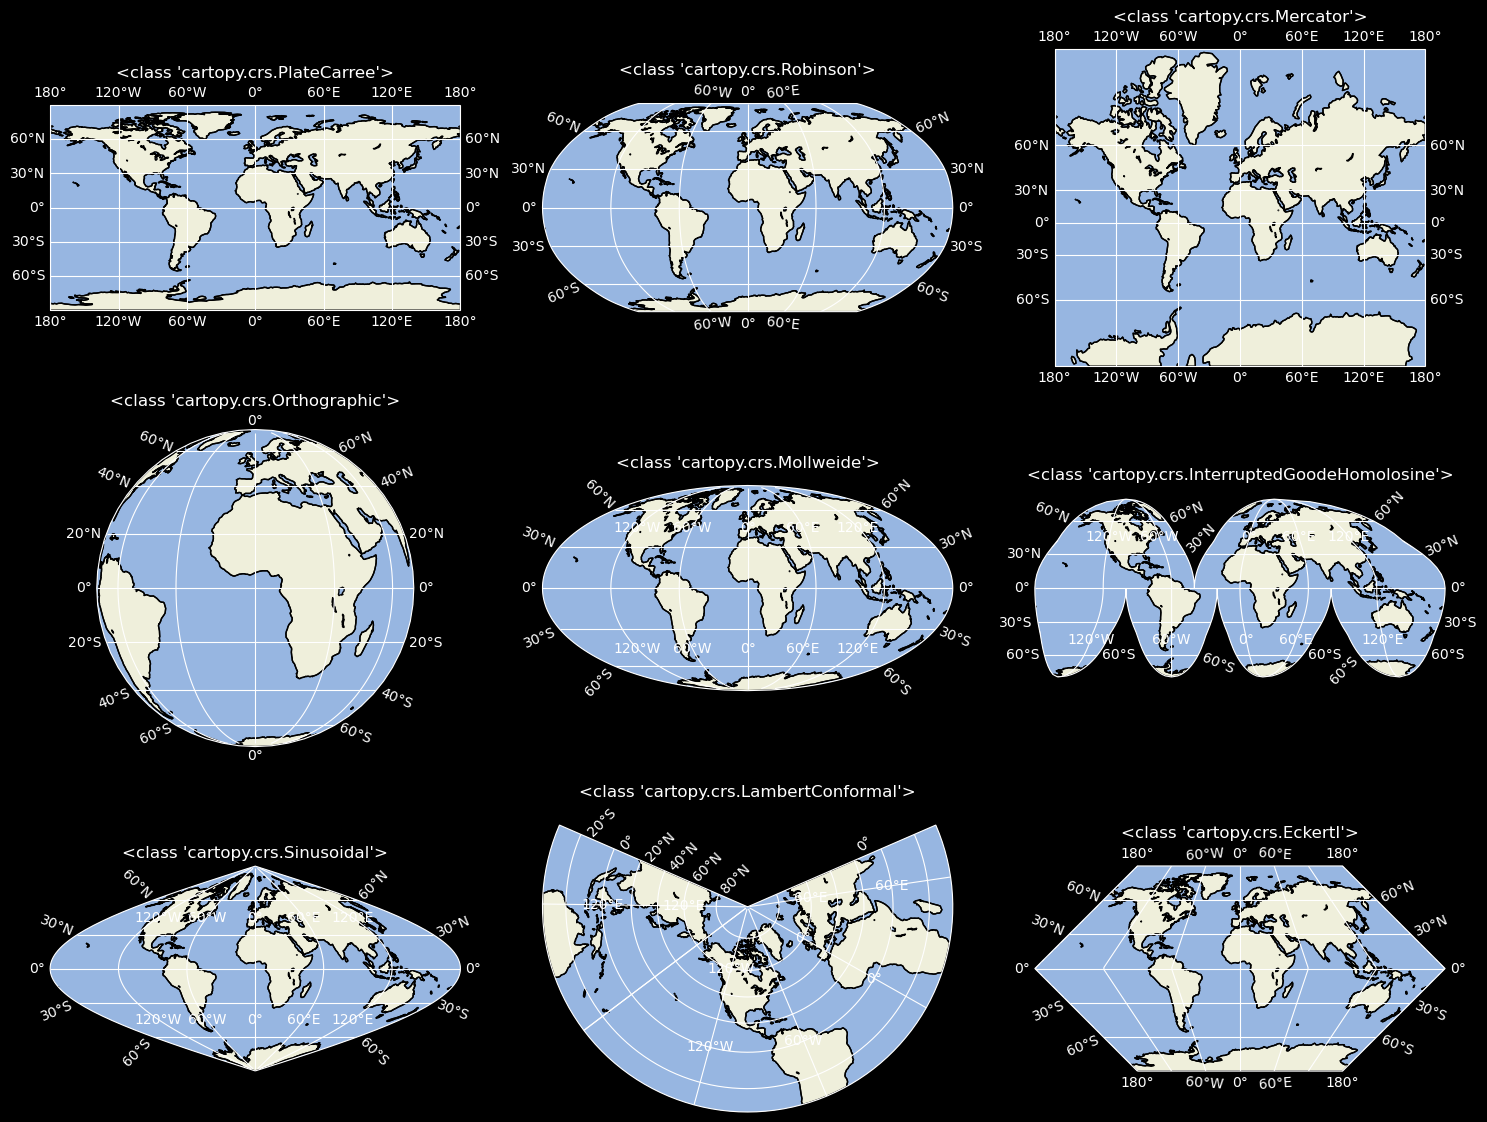

In [14]:
# set a list for multiple projections
projections = [ccrs.PlateCarree(), ccrs.Robinson(), ccrs.Mercator(), ccrs.Orthographic(), ccrs.Mollweide(),
               ccrs.InterruptedGoodeHomolosine(), ccrs.Sinusoidal(), ccrs.LambertConformal(),ccrs.EckertI()]

# plot on subplots using a for-loop
fig=plt.figure(figsize=(18,14))
for i, proj in enumerate(projections, 1):
    ax = fig.add_subplot(3, 3, i, projection=proj)
    #ax.stock_img()  # add a low-resolution topological colormap
    ax.coastlines()
    ax.gridlines(draw_labels = True)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    ax.set_title(f'{type(proj)}', fontsize='large')

plt.show()

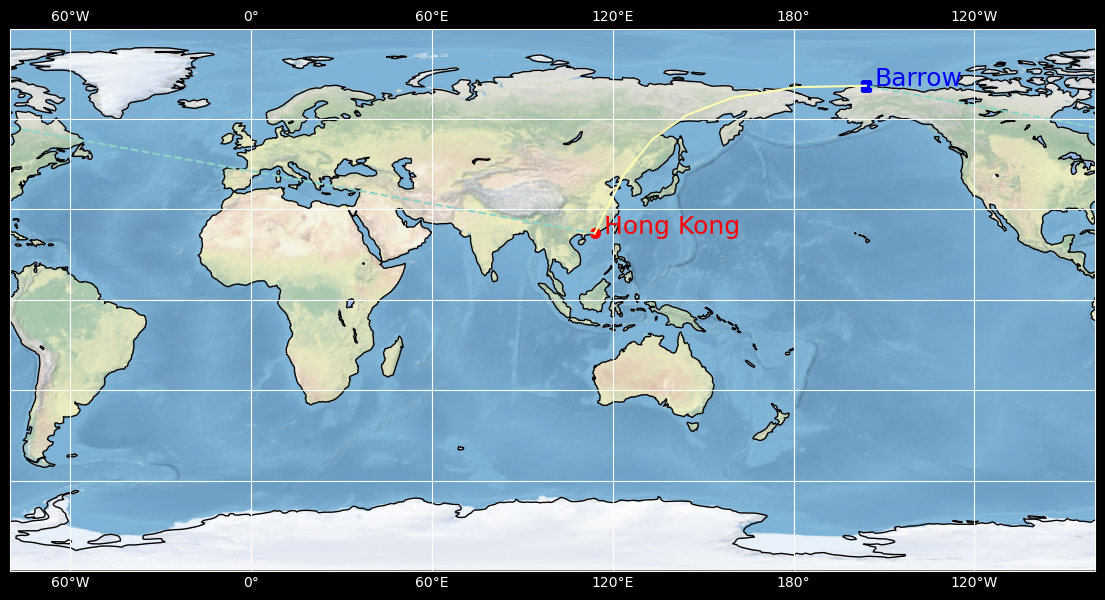

In [15]:
# geographic coordinates of Hong Kong and Barrow - here I used the data structure dict
Hong_Kong = dict(lon=114, lat=22)
Barrow    = dict(lon=-156, lat=71)
lons = [Hong_Kong['lon'], Barrow['lon']] # list of longitudes of the two cities
lats = [Hong_Kong['lat'], Barrow['lat']] # list of latitudes of the two cities

plt.figure(figsize=(14,10)) # create a figure with asize of (14,10)
# create a map project of PlateCarree, centered at 100 degrees longitude
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=100)) 
ax.coastlines(resolution='110m') # plot coastlines using the '110m' resolution

ax.gridlines(draw_labels = True) # show lat-lon grid lines
ax.add_feature(cfeature.OCEAN)   # add features to the map
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.stock_img() # add simple geographic topology

# plot Hong Kong on the map projection - pay attention to the "transform" option
ax.plot(Hong_Kong['lon'], Hong_Kong['lat'], 'ro', markersize=7, transform=ccrs.PlateCarree())
ax.text(Hong_Kong['lon']+3, Hong_Kong['lat'], 'Hong Kong', color = 'r',fontsize=18, transform=ccrs.PlateCarree())

# plot Barrow on the map projection - pay attention to the "transform" option
ax.plot(Barrow['lon'], Barrow['lat'], 'bs', markersize=7, transform=ccrs.PlateCarree())
ax.text(Barrow['lon']+3, Barrow['lat'], 'Barrow', color = 'b',fontsize=18, transform=ccrs.PlateCarree())

# plot a "great circle" between the two cities - doesn't work with the PlateCarree projection!
ax.plot(lons,lats,'--',transform=ccrs.PlateCarree()) # you get a straightline which isn't a great circle!

# plot a real great circle between the two cities - in the Geodetic projection
ax.plot(lons,lats,transform=ccrs.Geodetic()) # Now it works
ax.set_global()

plt.show()